# The Titanic Disaster: A Data Analysis & ML Project
By: Gavin Williams

In [1]:
import pandas as pd
from pandas import Series,DataFrame

First, let's create our intial dataframe using the csv file, "train", which provides the outcome (also known as the “ground truth”) for each passenger of the Titanic.

In [2]:
titanic_df = pd.read_csv('train.csv')

Let's take a look at the first five (5) rows of the dataframe, titanic_df:

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


According to Kaggle, the data dictionary is as follows:

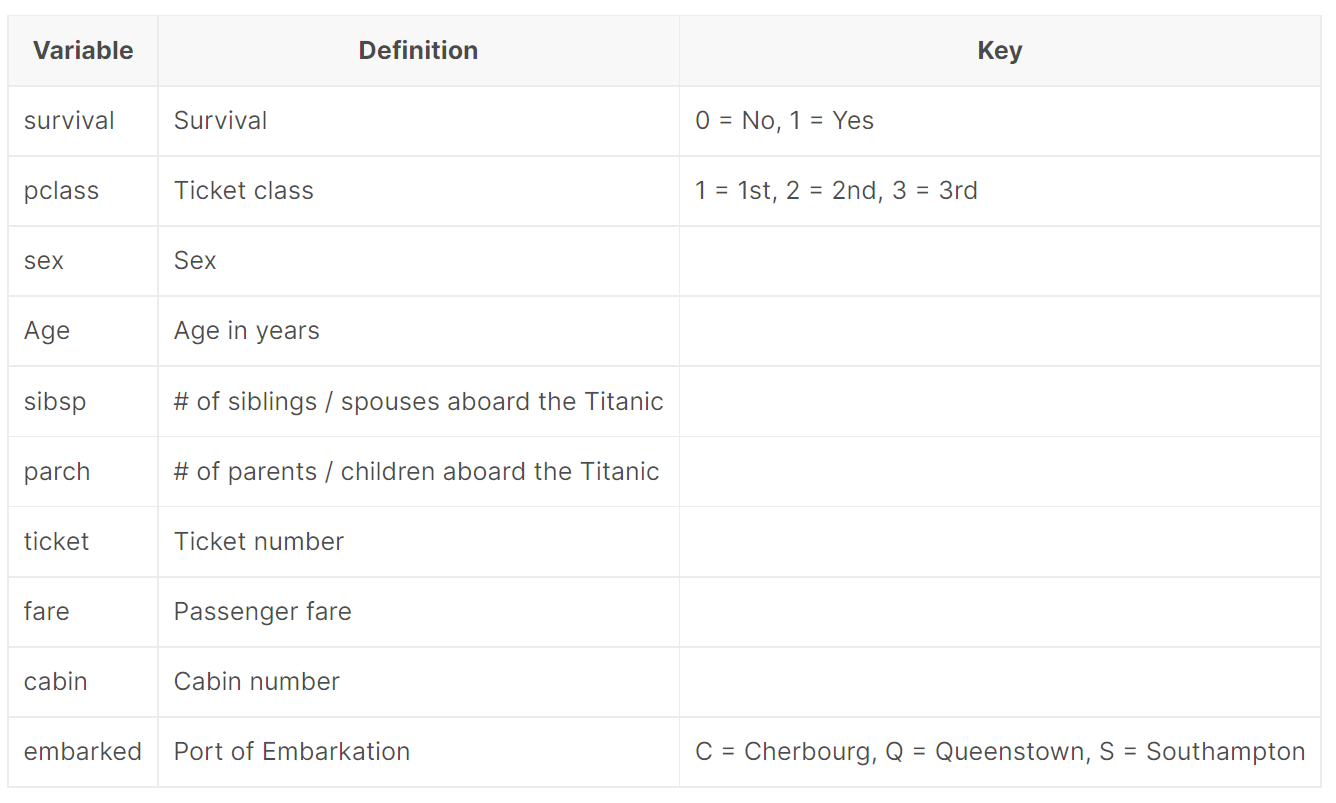

Let's gather some general information on the dataframe itself using Pandas info() method:

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on the information above, three columns possess null values: Age, Cabin, and Embarked. Null values in these columns will be addressed later in the notebook.

Before beginning our analysis, let's quickly clean up the feature 'Name' by splitting it into two distinct columns: 'First_Name' and 'Last_Name'. While it is unlikely we will analyze the data at the individual level, it is nice to have a cleaner dataframe just in case.

In [5]:
# splits each row's string value into a list
titanic_df['Name'] = titanic_df['Name'].str.split()

# functions that will be "applied" to the series 'Name' of the dataframe
def first_name(name):
    return name[-1]

def last_name(name):
    return name[0]

# creates two new columns, 'First_Name' and 'Last_Name'
titanic_df['First_Name'] = titanic_df['Name'].apply(first_name)
titanic_df['Last_Name'] = titanic_df['Name'].apply(last_name)

# removes all non-alphabetical characters (e.g., commas) from the two new columns
titanic_df['First_Name'] = titanic_df['First_Name'].str.replace('[^a-zA-Z]', '')
titanic_df['Last_Name'] = titanic_df['Last_Name'].str.replace('[^a-zA-Z]', '')

C:\Users\cashi\AppData\Local\Temp\ipykernel_12232\3395345649.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_df['First_Name'] = titanic_df['First_Name'].str.replace('[^a-zA-Z]', '')
C:\Users\cashi\AppData\Local\Temp\ipykernel_12232\3395345649.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_df['Last_Name'] = titanic_df['Last_Name'].str.replace('[^a-zA-Z]', '')


Let's take a look at the dataframe:

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name,Last_Name
0,1,0,3,"[Braund,, Mr., Owen, Harris]",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Harris,Braund
1,2,1,1,"[Cumings,, Mrs., John, Bradley, (Florence, Bri...",female,38.0,1,0,PC 17599,71.2833,C85,C,Thayer,Cumings
2,3,1,3,"[Heikkinen,, Miss., Laina]",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,Heikkinen
3,4,1,1,"[Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...",female,35.0,1,0,113803,53.1000,C123,S,Peel,Futrelle
4,5,0,3,"[Allen,, Mr., William, Henry]",male,35.0,0,0,373450,8.0500,NaN,S,Henry,Allen


As we can see, 'Name' has been separated into two new columns: 'First_Name' and 'Last_Name'. All special characters have been removed in the two new columns.

Let's now move the two new columns forward in the dataframe...

In [7]:
# reorders columns of dataframe and drops feature 'Name'
titanic_df = titanic_df[['PassengerId', 'Survived', 'Pclass', 'First_Name', 'Last_Name', 'Sex', 'Age', 'SibSp', 
                         'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
titanic_df

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Edith,Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Carrie,Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Howell,Behr,male,26.0,0,0,111369,30.0000,C148,C


It is important to know the primary key, or unique column, of the dataset. It appears PassengerId is the PK; however, let's run the following method on the dataframe to confirm:

In [8]:
# confirms feature 'PassengerId' is the PK
titanic_df['PassengerId'].is_unique

True

A data analysis project's main priority should be answering questions about the data. Since we now know the categories within the dataset, let's develop a list of questions that we will attempt to address in the analysis:

    1) Who were the passengers on the titanic?
    2) What deck were the passengers on, and how does that relate to their class?
    3) Where did the passengers embark from?
    4) Who was alone on the ship, and who was with family?
    5) What features (e.g., deck level) had an impact on a passenger's survival rate? Are there any discernable 
       relationships or patterns?

# Who were the passengers on the Titanic?

Let's begin with addressing the first question: who were the passengers on the titanic? We will analyze this according to age, gender, class and more...

In [9]:
# import tools required for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# aggregates by feature 'Sex' and counts
sex_df = titanic_df.groupby('Sex').count()

# creates an additional coloumn for the percentage breakdown of male and female passengers
sex_df['PctOfTotal'] = sex_df['PassengerId'] / sex_df['PassengerId'].sum()

sex_df.loc[:, ['PassengerId','PctOfTotal']]

,PassengerId,PctOfTotal
Sex,,
female,314,0.352413
male,577,0.647587


Viewing the dataframe above, it's apparent that there was nearly double the amount of males as there were females on the Titanic at ~64.5% respectively.

Let's also project this data using a bar graph:

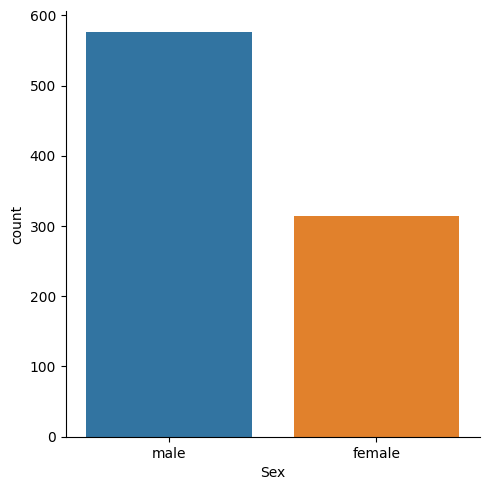

In [11]:
sns.catplot(data = titanic_df, x = 'Sex', kind = 'count')

Now that we understand the sex breakdown among passengers, let's dig even deeper to understand the the breakdown of ticket classes, 'Pclass', among both sexes.

In [12]:
sex_pclass_df = titanic_df.groupby(['Sex','Pclass'])

# creates a dataframe that resembles and pivot table
sex_pclass_df['PassengerId'].count().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


Let's visualize this as well:

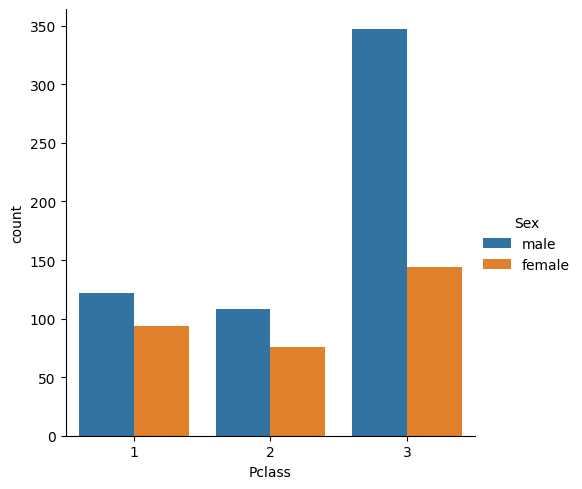

In [13]:
sns.catplot(data = titanic_df, x = 'Pclass', kind = 'count', hue = 'Sex')

The dataframe and bar chart above both confirm that the majority of passengers (347 total) were male and possessed 3rd class tickets

Among the passengers on the Titanic, it could be useful to understand what the separation was between women, men and children. To make this distinction, we will create a helper function that identifies each passenger as a child if he or she is under 16 years old.

In [14]:
# boolean function to determine if a passenger is a child or not
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [15]:
# creates a new column 'Person' by applying the helper function above 'male_female_child' to each row
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

Now, let's take a look at the first 10 rows of the dataframe:

In [16]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,James,Moran,male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,J,McCarthy,male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,Leonard,Palsson,male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,Berg,Johnson,female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,Achem,Nasser,female,14.0,1,0,237736,30.0708,NaN,C,child


Viewing the final column, it's apparent that the helper function distinguished which passengers are children versus adults. Using the new column, let's aggregate the three distinctions to understand the population on the ship:

In [17]:
# creates an aggregate pandas object by grouping by the new feature 'Person'
person_group = titanic_df['PassengerId'].groupby(titanic_df['Person'])

# returns count of 'Person' using the above pandas object 
person_group.count()

Person
child      83
female    271
male      537
Name: PassengerId, dtype: int64

Like before, let's also generate a grouped bar graph to see this data visually:

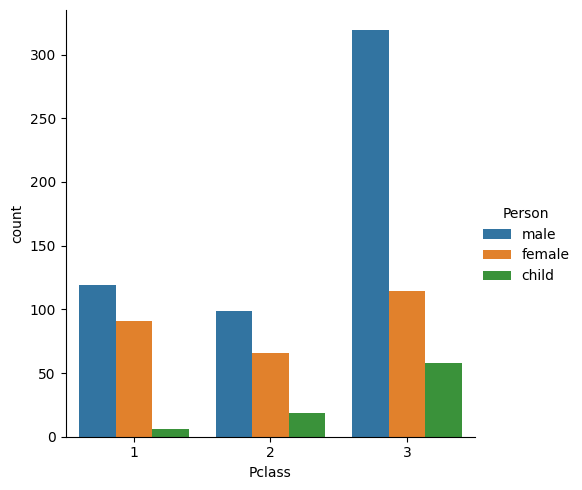

In [18]:
sns.catplot(data = titanic_df, x = 'Pclass', kind = 'count', hue = 'Person')

The bar chart above shows that a majority of the Titanic's passengers were male with the largest percentage of them representing the 3rd class on the ship. Additionally, it shows that the majority of children on the ship were in third class.

Now, let's get an idea on the age breakdown of the passengers on board. We'll create a dataframe with passengers separated by the age range they fall within. Before creating our bins, let's gather some general information on the Titanic's passengers:

In [19]:
# determines the maximum, minimum, and average age of the 'Age' feature
print('Age of Oldest Passenger: ' + str(titanic_df['Age'].max()) + '\n' +
     'Age of Youngest Passenger: ' + str(titanic_df['Age'].min()) + '\n' +
    'Average Age of Passenger: ' + str(round(titanic_df['Age'].mean(), ndigits = 2)))

Age of Oldest Passenger: 80.0
Age of Youngest Passenger: 0.42
Average Age of Passenger: 29.7


In [20]:
# creates list that will be used for the bins argument in the following dataframe method
age_ranges = [0,20,40,60,80]

# returns count of passengers within each age range/bin
titanic_df['Age'].value_counts(bins = age_ranges, sort = False)

(-0.001, 20.0]    179
(20.0, 40.0]      385
(40.0, 60.0]      128
(60.0, 80.0]       22
Name: Age, dtype: int64

Viewing the two lines above, it's evident that the youngest passenger on the boat was under one year old, and the oldest was exactly 80 years old. Furthermore, the majority of passengers were between 20 and 40 years old on the ship at 385 passengers or ~53.9%.

It would also be useful to see the distribution of passenger ages on the Titanic. We'll generate this distribution by creating a histogram. I'll utilize Matplotlib this time instead of Seaborn.

Text(0, 0.5, 'Count of Passengers')

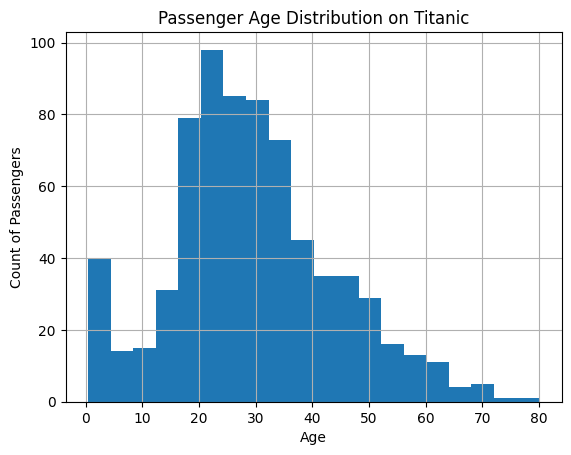

In [21]:
titanic_df['Age'].hist(bins = 20)
plt.title('Passenger Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')

The histogram above validates the conclusion made prior: the majority of passengers on the Titanic were between the ages of 20 and 40.

Using the dataset, let's now create a couple area charts using Seaborn's FacetGrid. We'll first create a FacetGrid using 'Person' as the legend then 'Pclass'.

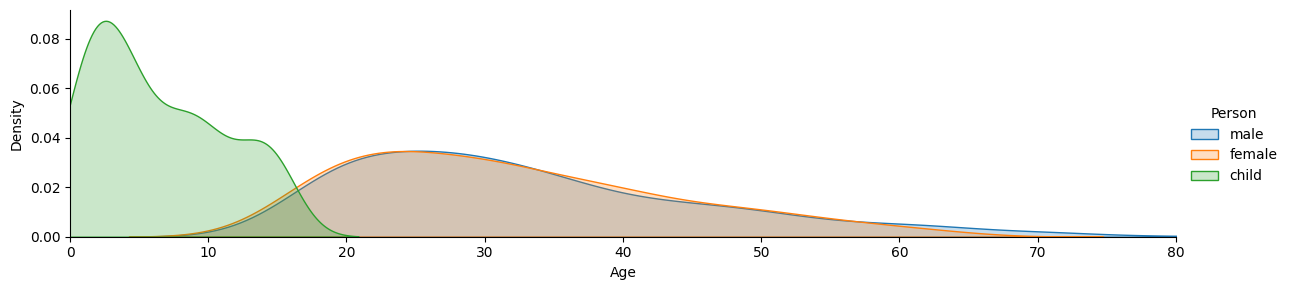

In [22]:
fig = sns.FacetGrid(data = titanic_df, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', fill = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

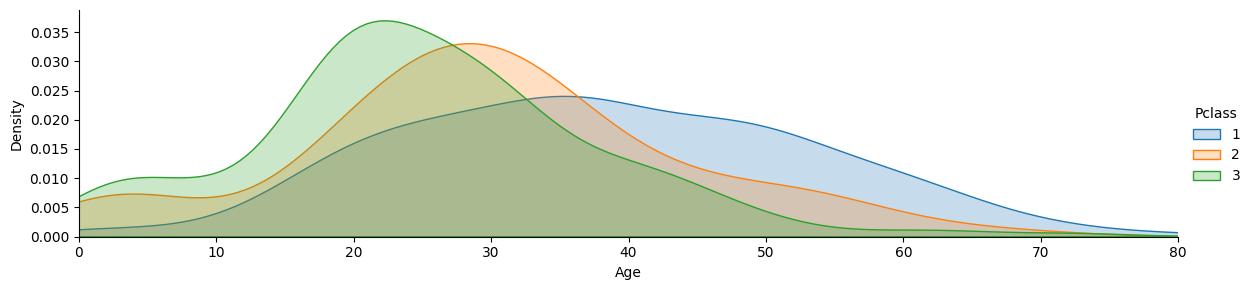

In [23]:
fig = sns.FacetGrid(data = titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', fill = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

Both chart above provide the same information as before, but in a more design friendly fashion.

By analyzing the passengers on the Titanic, we can conclude the following:
    
       1) On the ship, there was nearly double the amount of males as there were females at ~64.5% 
       respectively. This breakdown is likely a sign of the times: in early 20th century, men exercised greater social, 
       economic, and political freedom than women. From a political standpoint, the U.S. did not grant women the right to 
       vote until 1920, almost a decade after the Titanic disaster.
       
       2) A majority of passengers were 3rd class ticket holders at 491. A little over 70% of these ticket holders were 
       male. By offering more 3rd class tickets, the Titanic's owners were able to generate greater revenue. Economies of 
       scale is clearly evident here.
       
       3) A majority of passengers were between 20 and 40 years old on the ship at 385 passengers or ~53.9%. This is likely 
       due to the physical demands placed on individuals during travel - adventurous trips tend to attract young and 
       healthy individuals free of ailments experienced in older age.

# What deck were passengers on, and how does this relate to their class?

We have analyzed who the passengers were on the Titanic. Now, let's try to better understand where passengers were located on the ship. I'll also look to find a connection between deck level and class.

To start, we need to remove the NaN values from the feature, 'Cabin', after which we will generate a graphic. Note, decks represent different levels on the ship. On the Titanic, there were 10 levels represented alphabetically with 'A' representing highest level and 'G' representing the bottom level.

In [24]:
# removes NaN values from the feautre 'Cabin'
deck = titanic_df['Cabin'].dropna()

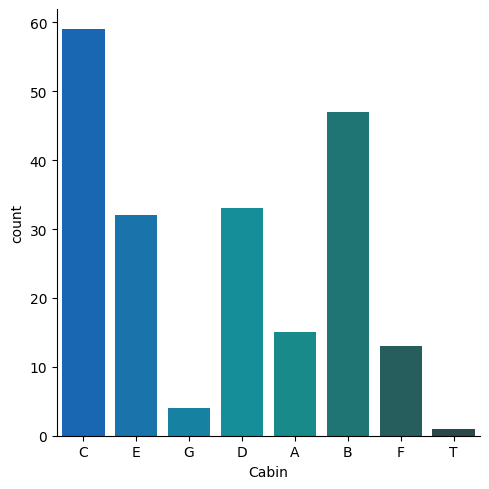

In [25]:
# appends the first alphanumeric character in the series 'Cabin' to the list 'deck_level' (e.g.; C24 --> C)
deck_level = []
for level in deck:
    deck_level.append(level[0])

# creates a dataframe of the deck_level
cabin_df = pd.DataFrame(data = deck_level)

# names the single column of the dframe as 'Cabin'
cabin_df.columns = ['Cabin']

sns.catplot(data = cabin_df, x = 'Cabin', kind = 'count', palette = 'winter_d')

The visual above is useful, but it could use some improvements. Let's remove the cabin level 'T' as this is an error in the data. Next, let's order the bars alphabetically, so it is easier to visualize the density of the ship from top to bottom.

In [26]:
# generates a boolean series on whether each row equals 'T'
cabin_T = cabin_df['Cabin'] == 'T'

# removes 'T' cabin levels from the dframe via boolean indexing
cabin_df = cabin_df[cabin_T == False]

# aggregates cabin levels, takes count of level, and sorts index in ascending order
result = cabin_df.groupby('Cabin')['Cabin'].count().sort_index()

Text(0.5, 1.0, 'Number of Titanic Passengers on Each Level of the Ship')

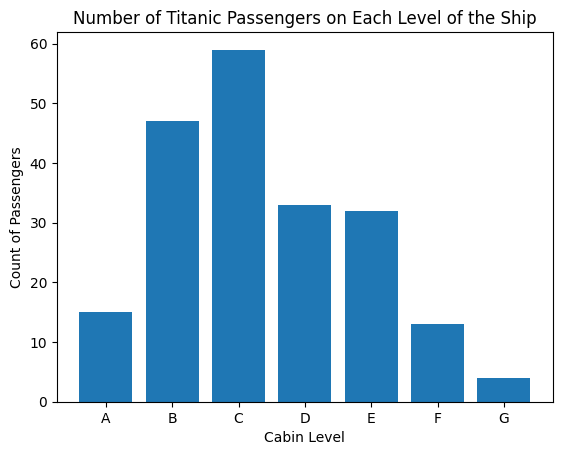

In [27]:
plt.bar(x = result.index, height = result.values, label = ['A','B','C','D','E','F','G'])
plt.xlabel('Cabin Level')
plt.ylabel('Count of Passengers')
plt.title('Number of Titanic Passengers on Each Level of the Ship')

Based on the graphic above, it appears a majority of the passengers were staying in the uppder-middle portion of the ship. This likely was due to the design of the ship's hull.

Let's create a dataframe of the percentage breakdown among all the levels based on the chart above. I'll first create a column of cabin levels to add to the existing 'titanic_df' dataframe for later analysis. Using this new column, I'll aggregate the levels, calculate the count of passengers at each level, and create an additional column for the percentage of total.

In [28]:
# function that will be applied to titanic_df to create column of alphabetic levels
def cabin_level(cabin):
        if pd.isnull(cabin) or cabin.startswith('T'):
            return None
        else:
            return cabin[0]

# applies above function 'cabin_level' and generates new column
titanic_df['Deck_Level'] = titanic_df['Cabin'].apply(cabin_level)

If we return a slice of the dataframe, you can see the new column 'Deck_Level' has been generated successfully:

In [29]:
titanic_df[['Cabin','Deck_Level']].head(10)

,Cabin,Deck_Level
0,NaN,None
1,C85,C
2,NaN,None
3,C123,C
4,NaN,None
5,NaN,None
6,E46,E
7,NaN,None
8,NaN,None
9,NaN,None


In [30]:
deck_pct = titanic_df.groupby('Deck_Level').count()
deck_pct['Pct'] = deck_pct['PassengerId'] / deck_pct['PassengerId'].sum()
deck_pct = deck_pct.rename(columns = {'PassengerId':'CountOfPassengers'})
deck_pct[['CountOfPassengers','Pct']]

,CountOfPassengers,Pct
Deck_Level,,
A,15,0.073892
B,47,0.231527
C,59,0.290640
D,33,0.162562
E,32,0.157635
F,13,0.064039
G,4,0.019704


Based on the dataframe above, roughly ~68% (139) passengers were staying in cabins B, C, and D, with cabin C housing the most at ~29%. Only 4 passengers were staying on level G; this is likely due to the fact that level G housed both the cargo and boiler room.

# Where did the passengers embark from?

Now, let's determine where the passengers came from. We can determine this using the feature 'Embarked'. According to the data dictionary, 'S' represents 'Southhampton', 'C' represents 'Chersbourg', and 'Q' represents 'Queenstown'. Before creating any visualizations, let's replace each value with the full name since it may not be fully evident what the letters represent.

In [31]:
def full_city(embarked):
    if embarked == 'Q':
        return 'Queenstown'
    elif embarked == 'C':
        return 'Chersbourg'
    elif embarked == 'S':
        return 'Southhampton'
    
titanic_df['EmbarkedCity'] = titanic_df['Embarked'].apply(full_city)

Let's view the dataframe to ensure the column was created correctly:

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck_Level,EmbarkedCity
0,1,0,3,Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,Southhampton
1,2,1,1,Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,Chersbourg
2,3,1,3,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Southhampton
3,4,1,1,Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,female,C,Southhampton
4,5,0,3,Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S,male,None,Southhampton


Now that we have confirmed the column 'EmbarkedCity' was created successfully, let's create a grouped bar chart to visualize the number of passengers from each 'Pclass' and the city from which they embarked.

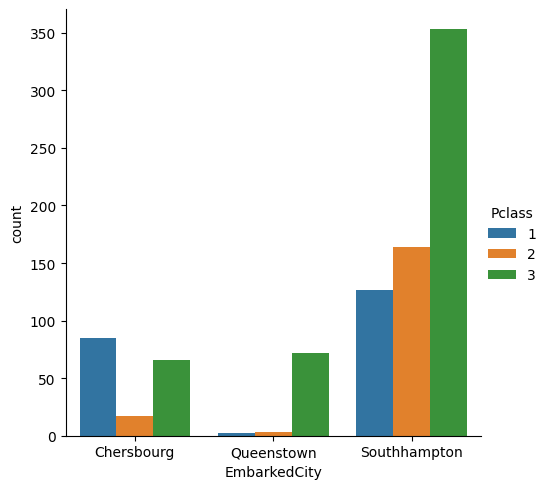

In [33]:
sns.catplot(data = titanic_df, x = 'EmbarkedCity', kind = 'count', hue = 'Pclass', order = ['Chersbourg', 'Queenstown', 'Southhampton'])

In viewing the graph above, the greatest number of total passengers embarked from Southhampton. Southhampton also had a relatively large number of third class passengers compared to the other cities. Why is that? The Titanic was built and departed from Southhampton, which could explain why the majority of passengers on the ship hailed from that city.

# Who was alone on the ship, and who was with family?
       

It would be nice to know who was with family, and who was alone on the Titanic. There are two columns that can help to determine this: 'SibSp' and 'Parch'. 'SibSp' indicates the number of sibilings or spouses on board; 'Parch' represents the number of parent or children on board. Therefore, if both are zero (0) for a passenger, he or she is alone on the ship.

We'll create a function to generate a new column called 'Solo' which will indicate if the passenger is with family ('With Family') or alone ('Solo').

In [34]:
# function to determine if a passenger is alone or with family
def lone_passenger(passenger):
    sib, par = passenger
    if sib == 1 or par == 1:
        return 'With Family'
    else:
        return 'Solo'

In [35]:
# creates new column and applies function above, 'lone_passenger'
titanic_df['Solo'] = titanic_df[['SibSp', 'Parch']].apply(lone_passenger, axis = 1)

If we return the first five rows of the dataframe, we can see that the column 'Solo' was created correctly:

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck_Level,EmbarkedCity,Solo
0,1,0,3,Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,Southhampton,With Family
1,2,1,1,Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,Chersbourg,With Family
2,3,1,3,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Southhampton,Solo
3,4,1,1,Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,female,C,Southhampton,With Family
4,5,0,3,Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S,male,None,Southhampton,Solo


Using the newly added column, let's analyze the breakdown of passengers with and without family on the ship:

In [37]:
# aggregates and returns count of passengers based on the column 'Solo'
solo = titanic_df.groupby('Solo')['Solo'].count()
solo

Solo
Solo           621
With Family    270
Name: Solo, dtype: int64

Text(0, 0.5, 'Count')

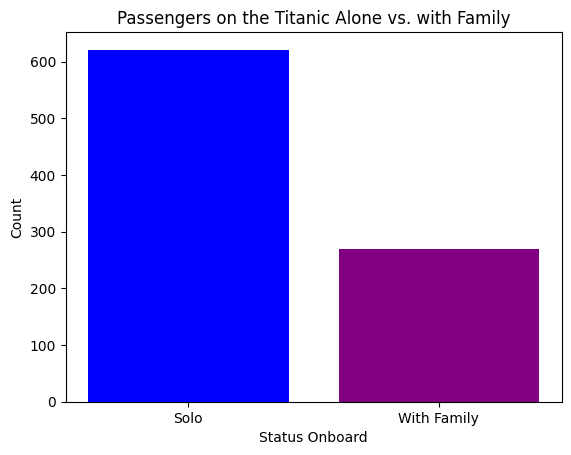

In [38]:
plt.bar(x = solo.index, height = solo.values, color = ['blue','purple'])
plt.title('Passengers on the Titanic Alone vs. with Family')
plt.xlabel('Status Onboard')
plt.ylabel('Count')

As you can see in the chart above, there was more than two times (~2.3x) the number of passengers (621 people) alone on the ship versus those with family.

I'm goig to make the assumption that a majority of the solo passengers were male based on our prior analysis. To verify this, let's enhance the bar chart above:

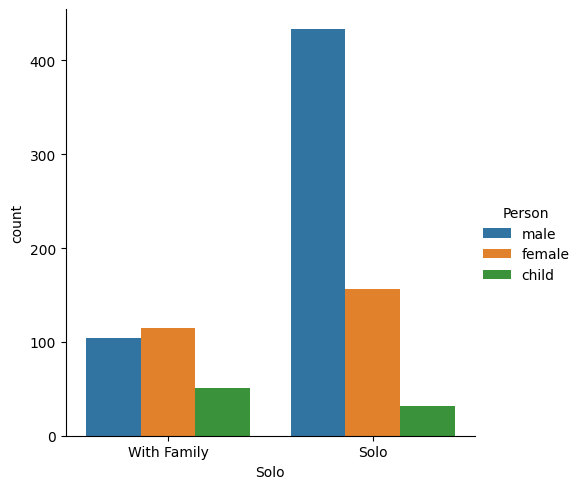

In [39]:
sns.catplot(data = titanic_df, x = 'Solo', kind = 'count', hue = 'Person')

In [40]:
titanic_df.groupby(['Solo','Person'])['PassengerId'].count().unstack()

Person,child,female,male
Solo,,,
Solo,32,156,433
With Family,51,115,104


Based the analysis, we can conclude the following:

    1) There was more than two times (~2.3x) the number of passengers (621 people) alone on the ship versus those with 
       family.
    
    2) Of the passengers alone on the ship, ~70% of them were male. This validates my prior conclusion that men exercised 
        greater social and economic freedom than women. In the early 20th century, it would be less likely to find a woman 
        travelling alone.

# How did survival relate to other features?

For the final part of the analysis prior to running our ML model, let's analyze one critical feature: survival. Let's analyze not only the survival but also how survival relates to other features (e.g.; sex).

First, I will create an additional column called 'Survivor' indicating if a passenger did or did not survive.

In [41]:
# maps 0 to 'No' and 1 to 'Yes' to create a new column called 'Survivor'
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck_Level,EmbarkedCity,Solo,Survivor
0,1,0,3,Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,Southhampton,With Family,No
1,2,1,1,Thayer,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,Chersbourg,With Family,Yes
2,3,1,3,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Southhampton,Solo,Yes
3,4,1,1,Peel,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,female,C,Southhampton,With Family,Yes
4,5,0,3,Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S,male,None,Southhampton,Solo,No


Let's now analyze the newly created column 'Survivor':

In [43]:
survived = titanic_df.groupby('Survivor').count()
survived['Pct'] = survived['Survived'] / survived['Survived'].sum()
survived[['Survived','Pct']]

,Survived,Pct
Survivor,,
No,549,0.616162
Yes,342,0.383838


Text(0.5, 0, 'Survived')

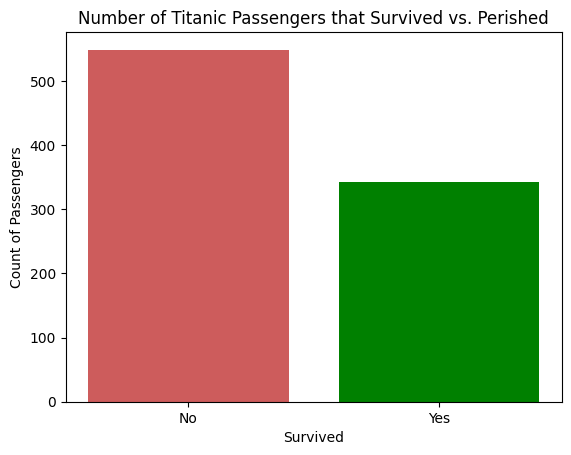

In [45]:
plt.bar(x = survived.index, height = survived['Survived'], color = ['indianred', 'green'])
plt.title('Number of Titanic Passengers that Survived vs. Perished')
plt.ylabel('Count of Passengers')
plt.xlabel('Survived')

Based on the dataframe and graphic above, only ~38% of passengers on the Titanic survived the wreck.

The following visualizations will look to determine the relationship between survival and the following features of the dataframe: sex/person, age, Pclass, deck level, etc.

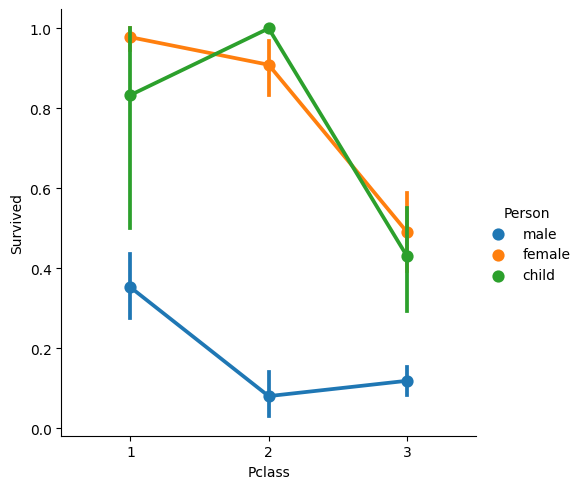

In [46]:
sns.catplot(x = 'Pclass', y = 'Survived', data = titanic_df, kind = 'point', hue = 'Person')

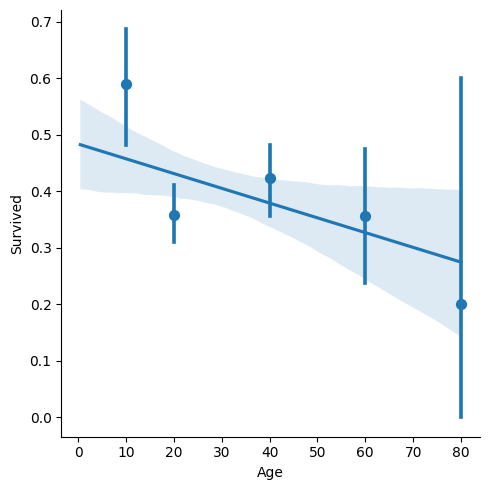

In [47]:
# creates list that will be used as age ranges for the lmplot
generations = [10, 20, 40, 60, 80]

sns.lmplot(x = 'Age', y = 'Survived', data = titanic_df, x_bins = generations)

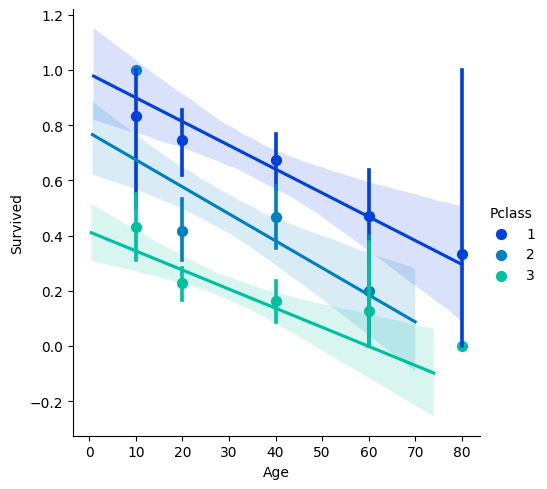

In [48]:
sns.lmplot(x = 'Age', y = 'Survived', data = titanic_df, hue = 'Pclass', palette = 'winter', x_bins = generations)

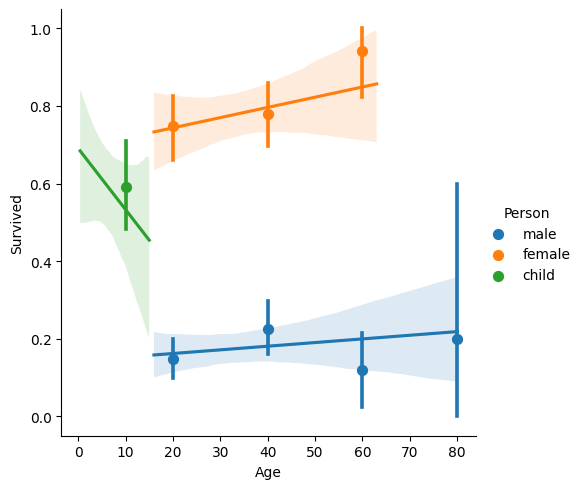

In [49]:
sns.lmplot(x = 'Age', y = 'Survived', data = titanic_df, hue = 'Person', x_bins = generations)

Based on the graphs above, we can conclude the following:
    
    1) The older a passenger was, the less likely he or she was to survive the disaster.
    
    2) 1st class passengers had the greatest chance of survival regardless of age
    
    3) Females were most likely to survive the distaster.

Using we what we know, let's attempt to answer the following two questions:

    1) Did the deck have an effect on the passengers survival rate?

    2) Did having a family member increase the odds of surviving the crash?

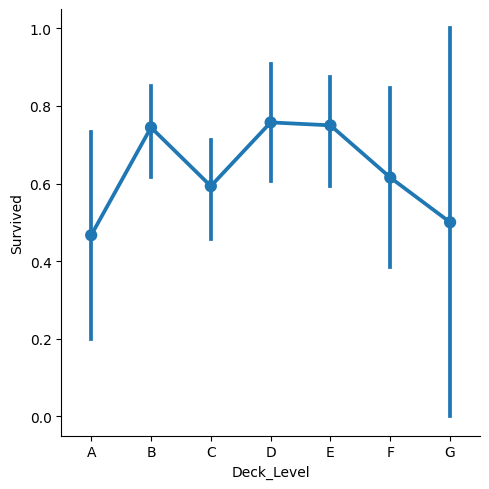

In [50]:
sns.catplot(x = 'Deck_Level', y = 'Survived', data = titanic_df, kind = 'point', order = ['A', 'B','C','D','E','F','G'])

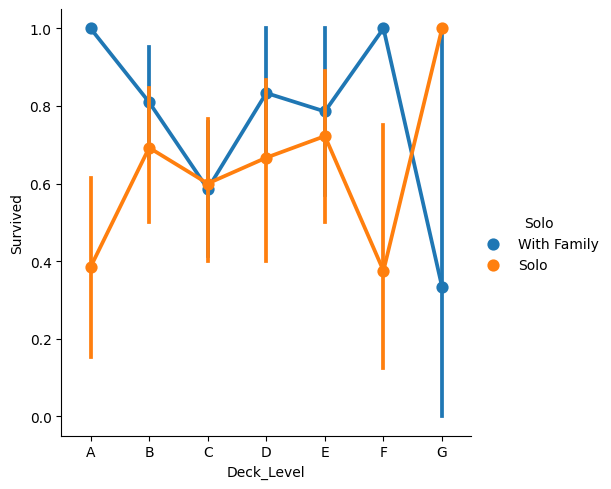

In [51]:
sns.catplot(x = 'Deck_Level', y = 'Survived', data = titanic_df, kind = 'point', order = ['A', 'B','C','D','E','F','G'], hue = 'Solo')

The charts above display the following:

    1) There is no discernable pattern/relationship between deck level and survival. For example, the survival rate between 
       level A and G is the same; however,
    
    2) Passengers who were alone on the ship had a less chance of survival than passengers with family on most levels of 
       the ship.

# Utilizing Machine Learning to Predict Survival Rates

Having performed an analysis of the raw data from the 'train.csv' dataset, I'll now look to create an ML model that predicts which passengers survived the Titanic. Two different datasets will be used for this phase of the project:

    1) The training set (train.csv) will be utilized to build the ML model.
    2) The test set (test.csv) will be leveraged to test the performance of the model

There are two minimum requirements to fulfill to create a successful model: no null values present in the data and all data must be in numeric format. The following lines of code will address these two areas.

Before addressing these areas, I'll select which features to include in the model. My selection criteria will be relatively basic - only columns that have few unique values and/or little or no null values will be included in the model.

In [60]:
train_df = pd.read_csv('train.csv')

In [61]:
test_df = pd.read_csv('test.csv')

The columns 'Name', 'Age', 'Ticket', 'Fare', and 'Cabin' will be dropped from both datasets due the above selection criteria...

In [62]:
train_df.drop(labels = ['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace = True, axis = 1)
test_df.drop(labels = ['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], inplace = True, axis = 1)

Now that the baseline has been established, let's address null values in the selected columns. Out of all fields remaining, 'Embarked' is the only feature that has null values. We can confirm this by returning information on both dframes:

In [63]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     889 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    object
 3   SibSp        418 non-null    int64 
 4   Parch        418 non-null    int64 
 5   Embarked     418 non-null    object
dtypes: int64(4), object(2)
memory usage: 19

Let's take a value count of the field 'Embarked':

In [64]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

To avoid complicating things, let's fill the null values with the most common string, 'S'. This adjustment must be made on BOTH dataframes:

In [65]:
# replaces null values in 'Embarked' feature of both dframes with 'S'
data = [train_df, test_df]

for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna('S')

Notice how the embarked column now has no null values present:

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


Since null values have been addressed in both datasets, I can now address incorrect data types. Recall, all features must be an integer or float for the ML model. The df.info() method displays the dtypes of each column:

In [68]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    object
 3   SibSp        418 non-null    int64 
 4   Parch        418 non-null    int64 
 5   Embarked     418 non-null    object
dtypes: int64(4), object(2)
memory usage: 19

Viewing the information above, we can see that 'Sex' and 'Embarked' are stored as objects in their respective dataframes. The following lines of code will convert these dtypes to integers.

In [69]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [70]:
# changes 'Sex' feature in both dframes to binary integers, 0 for male and 1 for female
gender_map = {'male':0, 'female':1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender_map)

In [71]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [72]:
# changes 'Embarked' feature in both dframes to integers, 0 for 'S', 1 for 'C', and 2 for 'Q'
embarked_map = {'S':0, 'C':1, 'Q': 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)

Viewing the information of both dframes, you'll notice all columns are in the correct dtype:

In [73]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Embarked     891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   SibSp        418 non-null    int64
 4   Parch        418 non-null    int64
 5   Embarked     418 non-null    int64
dtypes: int64(6)
memory usage: 19.7 KB
None None


The final step before running the ML model will be selecting the x's and y's for the model, or our features and labels.

In [75]:
# all features for training purposes. Drop PassengerId as it serves no value.
# Survived is also dropped as it is our y portion
x_train = train_df.drop(['Survived', 'PassengerId'], axis = 1)

# all y's that will be predicted by us
y_train = train_df['Survived']

In [76]:
x_test = test_df.drop('PassengerId', axis = 1)

The next and final step is to select a model and train it. Since this is an introductory ML project, I have selected to use logistic regression.

In [77]:
from sklearn.linear_model import LogisticRegression

# defines classifier 'clf'
clf = LogisticRegression(random_state = 0)

# fits classifier on training set
clf.fit(x_train, y_train)

# predicts values from x_test and saves them to y column 'y_pred'
y_pred = clf.predict(x_test)

Let's print the variable 'y_pred' which will appear as 0's and 1's for whether the passenger survived or perished:

In [80]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Finally, let's evaluate the model to see how correct our values are.

In [81]:
acc_logistic = round(clf.score(x_train, y_train)*100, 2)
acc_logistic

80.25

The output above means that my models accuracy is 80.25%. In other words, my model correctly predicted whether a passenger survived or perished on the Titanic 80.25% of the time.

I'll quickly create a dataframe that includes the test passenger and his/her survival outcome as predicted by my model

In [83]:
output = pd.DataFrame(data = {'PassengerId': test_df.PassengerId, 'Survived': y_pred})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# The End